<a href="https://colab.research.google.com/github/Saurabhbiswas16/018_SaurabhBiswas/blob/main/Lab4/CE018_Weather_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

Prepare dataset

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']



Encoding the features using one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(X)
X_enc = OneHotEncoder().fit_transform(X).toarray()
print(X_enc)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Play)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


 merge different features to prepare dataset

In [ ]:
# create a tuples of different values
print("\nFeatures\n")
for pair in X_enc:
  print(pair)


Features

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_enc, Y_enc, test_size = 0.3, random_state = 18)
print(x_train)

[[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]]


 train "Create and train DecisionTreeClassifier"

In [13]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4


Predict output for new data

In [14]:
# Prediction
print(x_test)

# y_predicted = dtc.predict(x_test)
print("y predicted : ", y_pred)

# y_predicted = dtc.predict(x_test)
print(f"Actual y_test {y_test}")

[[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]]
y predicted :  [1 0 1 1 1]
Actual y_test [0 1 1 1 0]


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[0, 2],
       [1, 2]])

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(metrics.classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



Confusion matrix:
[[0 2]
 [1 2]]


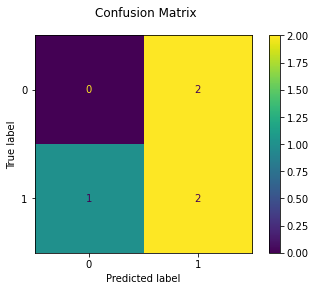

In [17]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

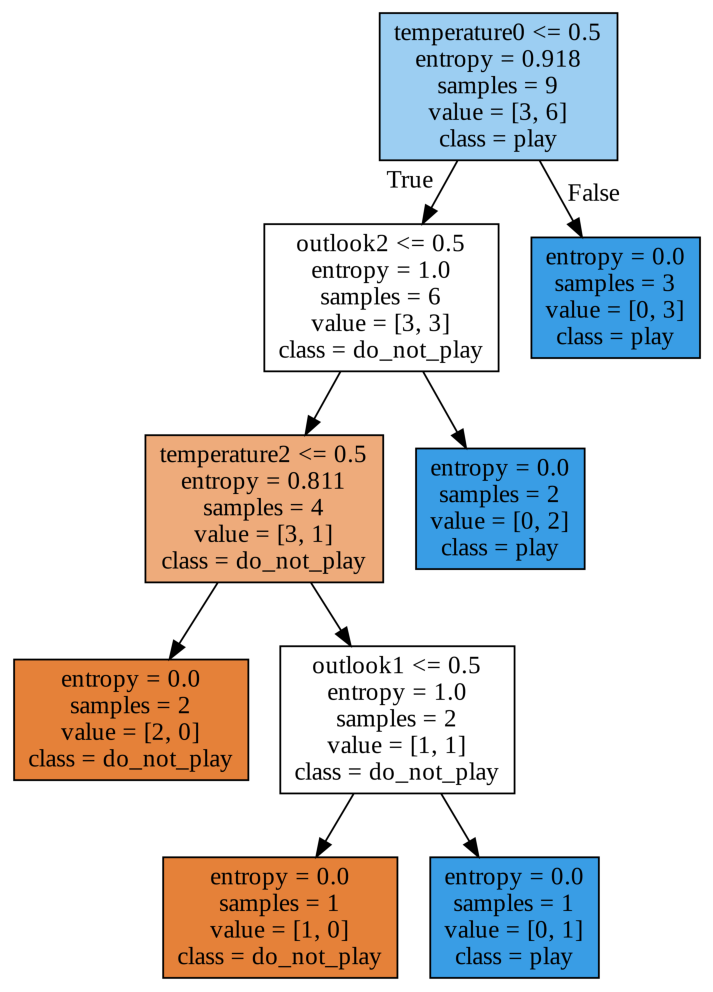

In [18]:
from subprocess import call
export_graphviz(dtc,out_file='tree_entropy.dot',
               feature_names=['outlook2','outlook1','outlook0','temperature2','temperature1','temperature0','humidity1','humidity0','wind1','wind0'],
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();